<a href="https://colab.research.google.com/github/AnastasiaBrinati/esercizi-PMCSN-23-24/blob/main/esercizio_feedback_simulazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install simpy

In [ ]:
import simpy
import random
from typing_extensions import NamedTuple
import datetime

In [ ]:
SIM_TIME = 1000  # Simulate until
JOB_SIZE = 1.5

In [ ]:
TIMES = {
    'arrival_times' : [],
    'queuing_times' : [],
    'service_times' : []
}

In [ ]:
class System(NamedTuple):
    server: simpy.Resource

In [ ]:
RANDOM_SEED_ARRIVI = 123
RANDOM_SEED_FEEDBACK = 456
RANDOM_SEED_SERVIZI = 789

stream_arrivi = random.Random(RANDOM_SEED_ARRIVI)
stream_feedback = random.Random(RANDOM_SEED_FEEDBACK)
stream_servizi = random.Random(RANDOM_SEED_SERVIZI)

In [ ]:
def feedback():
  # eventual feedback
  beta = 0.2
  r = stream_feedback.random()
  if(r <= beta):
    # job gets feed back into the system
    return 1
  # job leaves the system
  return 0

In [ ]:
def job(env, id, sys):

  flag = True
  while(flag):

    arrival_at_queue = env.now
    print("job " + id + ' arrived at %f' % arrival_at_queue)

    # Enter the queue, candidate ad a request for the server
    with sys.server.request() as my_turn:
      # Wait until it's our turn
      yield my_turn
      time_queued = env.now - arrival_at_queue
      print('job ' + id +' waited for %f' % time_queued)

      # Start the service
      print('job '+id+' starts being served at %f' % env.now)
      size = stream_servizi.uniform(1,2)
      #size = stream_servizi.random()+1
      yield env.timeout(size)
      # The service process has finished: Resource released automatically
      print('job '+id+' finished service at %f' % env.now)


    if(not feedback()):
      print("job " + id + " leaving the system at %f " % env.now)
      TIMES['queuing_times'].append(time_queued)
      flag = False

In [ ]:
arrival_rate = 0.5

def job_arrivals(env, system):
    id = 0
    """Create new *jobs* until sim time."""
    while True:
        # timeout interarrival times, waiting before generating another job
        yield env.timeout(stream_arrivi.expovariate(1/arrival_rate))

        # simplifying the example with fixed job size (fixed service times)
        env.process(job(env, str(id), system))
        id += 1

In [ ]:
# Setup and start the simulation
print('Prova Simulazione')
env = simpy.Environment()

# Create system
system = System(
    server = simpy.Resource(env, capacity=1)
)

# Start process and run until sim time
env.process(job_arrivals(env, system))
env.run(until=SIM_TIME)

Prova Simulazione
job 0 arrived at 0.026892
job 0 waited for 0.000000
job 0 starts being served at 0.026892
job 1 arrived at 0.072504
job 2 arrived at 0.333988
job 3 arrived at 0.390965
job 0 finished service at 1.505555
job 0 leaving the system at 1.505555 
job 1 waited for 1.433051
job 1 starts being served at 1.505555
job 4 arrived at 1.548288
job 5 arrived at 1.567738
job 6 arrived at 1.951892
job 7 arrived at 2.153773
job 8 arrived at 3.109337
job 1 finished service at 3.143656
job 1 leaving the system at 3.143656 
job 2 waited for 2.809668
job 2 starts being served at 3.143656
job 9 arrived at 3.196313
job 10 arrived at 3.401967
job 11 arrived at 3.605047
job 12 arrived at 3.745674
job 13 arrived at 3.746510
job 14 arrived at 4.033105
job 15 arrived at 4.078950
job 16 arrived at 4.534104
job 17 arrived at 4.570323
job 2 finished service at 4.634504
job 2 leaving the system at 4.634504 
job 3 waited for 4.243539
job 3 starts being served at 4.634504
job 18 arrived at 4.759827
job 

tempo medio in coda: 346.597804 


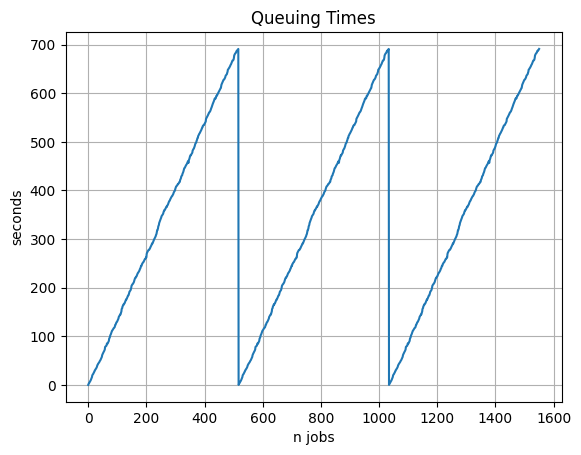

In [ ]:
# Analysis/results
import numpy as np
queuing_time_avg = sum(TIMES['queuing_times']) / len(TIMES['queuing_times'])
print("tempo medio in coda: %f " % queuing_time_avg)

from matplotlib import pyplot as plt
plt.plot(TIMES['queuing_times'])

plt.ylabel('seconds')
plt.xlabel("n jobs")
plt.title("Queuing Times")
plt.grid()
plt.show()